# Tarea 2

En esta tarea se muestra el proceso de preparación
y visualización de datos para su posterior análisis.
## Tabla de Contenidos

1.  [Seleccion y carga de datos](#0)
1.  [Limpieza de datos](#1)
1.  [Estandarizar datos de entrada](#2)
1.  [Visualización de gráficos](#3)

- Se instalan en caso de ser necesario las librerías a continuación

In [208]:
!pip install openpyxl


Importan bibliotecas necesarias para el procesamiento de la base de datos y la posterior visualización de los datos.

In [209]:
# importa las bibliotecas Pandas, Numpy
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import re

# 1. Seleccion y carga de datos <a id="0"></a>
Para esta tarea se ha seleccionado la base de datos "Chile earthquakes" que contiene datos de terremotos ocurridos en Chile entre los años 1520 y 2020.

Descripcion de las columnas:

- "Year": año del terremoto
- "Mo": mes del terremoto
- "Dy": dia del terremoto
- "Hr": hora del terremoto
- "Mn": minuto del terremoto
- "Tsu": id del tsunami asociado al terremoto en caso de que ocurriese 
- "Country": Chile
- "Location Name": region de Chile
- "Latitude": latitud del epicentro del terremoto
- "Longitude": longitud del epicentro del terremoto
- "Focal Depth (km)": profundidad del epicentro del terremoto
- "Mag": magnitud en escala de Richter del terremoto
- "Deaths": numero de personas fallecidas asociadas al terremoto
- "Missing" numero de personas perdidas asociadas con el terremoto
- "Injuries": numero de personas lesionadas asociadas con el terremoto
- "Damage ($Mil)": costo total del terremoto
- "Houses Destroyed": numero total de casas destruidas
- "Houses Damaged": numero total de casas dañadas

#### A continuacion se lee la base de datos y se guarda para su manipulación en una variable llamada "df". 

In [210]:
ubicacion = "./datos/chile_earthquakes_1520-2024.tsv"

directorio_salida = "./salida/"

- Como la base de datos trae las etiquetas de cada columna, se crea una lista de encabezados para la base de datos y se asigna a la variable "encabezado", de esta forma es posible identificar el encabezado de cada columna y posteriormente identificar una columna mediante este mismo.

In [211]:
# Crea una lista con el encabezado
encabezado = ["Search Parameters",	"Year",	"Mo",	"Dy",	"Hr",	"Mn",	"Tsu",	"Country",	"Location Name",	"Latitude",	"Longitude",	"Focal Depth (km)",	"Mag",	"Deaths",	"Missing",	"Injuries",	"Damage ($Mil)",	"Houses Destroyed",	"Houses Damaged"]
df = pd.read_csv(ubicacion, sep='\t', names=encabezado)

(OPCIONAL) Comprobar que los encabezados se guardaron correctamente

In [212]:
print("headers\n", encabezado)

headers
 ['Search Parameters', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Tsu', 'Country', 'Location Name', 'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'Deaths', 'Missing', 'Injuries', 'Damage ($Mil)', 'Houses Destroyed', 'Houses Damaged']



(OPCIONAL) Comprobar que los datos se cargaron correctamente mediante la visualización de las primeras 10 filas 

In [213]:
df.head(20)

,Search Parameters,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,Search Parameters,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
1,"[""Region = 160 - South America"",""Country = CHI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1520,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1543,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1562,10,28,10,NaN,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1570,2,8,13,NaN,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
7,NaN,1604,12,NaN,NaN,NaN,NaN,CHILE,CHILE,-29.9,-71.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1615,9,16,NaN,NaN,230,CHILE,CHILE: ARICA,-18.5,-70.35,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1633,5,14,NaN,NaN,246,CHILE,CHILE: FORT CARELMAPU,-41.8,-73.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Limpieza de datos <a id="1"></a>
Para su posterior visualización y análisis, se procede a limpiar la base de datos de datos innecesarios o nulos mediante diferentes metodos.

- Eliminacion de fila innecesaria para el analisis de datos: en este caso se identifican columnas que no entregan información relevante la fila 0 y 1 y la columna con el encabezado "Search Parameters".

In [214]:
# Elimina las filas 0 y 1
df = df.drop([0, 1])

# Reinicia los índices
df = df.reset_index(drop=True)

# Elimina la columna "Search Parameters"
df = df.drop("Search Parameters", axis=1)

df.head(10)

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1543,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1562,10,28,10,NaN,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,2,8,13,NaN,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
5,1604,12,NaN,NaN,NaN,NaN,CHILE,CHILE,-29.9,-71.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1615,9,16,NaN,NaN,230,CHILE,CHILE: ARICA,-18.5,-70.35,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN
7,1633,5,14,NaN,NaN,246,CHILE,CHILE: FORT CARELMAPU,-41.8,-73.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1639,12,NaN,NaN,NaN,NaN,CHILE,CHILE,-30,-71.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1647,5,14,2,30,NaN,CHILE,CHILE: SANTIAGO,-33.4,-70.6,NaN,8.5,1000,NaN,NaN,NaN,300,NaN


Se realiza un analisis basico de los datos de entrada

In [215]:
#Información y análisis estadístico
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              198 non-null    object
 1   Mo                195 non-null    object
 2   Dy                193 non-null    object
 3   Hr                151 non-null    object
 4   Mn                147 non-null    object
 5   Tsu               145 non-null    object
 6   Country           198 non-null    object
 7   Location Name     198 non-null    object
 8   Latitude          198 non-null    object
 9   Longitude         198 non-null    object
 10  Focal Depth (km)  110 non-null    object
 11  Mag               146 non-null    object
 12  Deaths            53 non-null     object
 13  Missing           2 non-null      object
 14  Injuries          23 non-null     object
 15  Damage ($Mil)     18 non-null     object
 16  Houses Destroyed  13 non-null     object
 17  Houses Damaged  

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
count,198,195,193,151,147,145,198,198,198,198,110,146,53,2,23,18,13,7
unique,123,12,31,24,52,145,1,89,133,104,46,33,26,2,20,16,13,7
top,1869,12,14,2,15,178,CHILE,CHILE: NORTHERN,-18.5,-71,33,7.5,1,30,200,100,300,15700
freq,6,25,14,11,10,1,198,23,7,16,22,11,13,1,2,2,1,1


In [216]:
# Dimensión del dataframe (rows, columns)
df.shape

(198, 18)

In [217]:
datos_faltantes = df.isnull()
datos_faltantes.head(10)

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,False,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True
2,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,True,True,True
3,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True
5,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True
6,False,False,False,True,True,False,False,False,False,False,True,False,True,True,True,True,True,True
7,False,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True
8,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True
9,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,False,True


In [218]:
for columna in datos_faltantes.columns.values.tolist():
    print('columna:',columna)
    print (datos_faltantes[columna].value_counts())
    print("")

columna: Year
Year
False    198
Name: count, dtype: int64

columna: Mo
Mo
False    195
True       3
Name: count, dtype: int64

columna: Dy
Dy
False    193
True       5
Name: count, dtype: int64

columna: Hr
Hr
False    151
True      47
Name: count, dtype: int64

columna: Mn
Mn
False    147
True      51
Name: count, dtype: int64

columna: Tsu
Tsu
False    145
True      53
Name: count, dtype: int64

columna: Country
Country
False    198
Name: count, dtype: int64

columna: Location Name
Location Name
False    198
Name: count, dtype: int64

columna: Latitude
Latitude
False    198
Name: count, dtype: int64

columna: Longitude
Longitude
False    198
Name: count, dtype: int64

columna: Focal Depth (km)
Focal Depth (km)
False    110
True      88
Name: count, dtype: int64

columna: Mag
Mag
False    146
True      52
Name: count, dtype: int64

columna: Deaths
Deaths
True     145
False     53
Name: count, dtype: int64

columna: Missing
Missing
True     196
False      2
Name: count, dtype: int64

c

In [219]:
#Cantidad de valores faltantes en cada columna
df.isnull().sum()

Year                  0
Mo                    3
Dy                    5
Hr                   47
Mn                   51
Tsu                  53
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths              145
Missing             196
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64

- Manipulación de valores faltantes: Reemplazando por su frecuencia las columnas "Mo", "Dy", "Hr" y "Mn".

In [220]:
# Calcula el promedio de la columna "Mo"
Mo_prom = df["Mo"].astype("float").mean(axis=0)

# Redondea el promedio al entero más cercano
Mo_prom_entero = int(round(Mo_prom))

# Reemplaza los valores faltantes en la columna "Mo" por su promedio entero
df["Mo"].fillna(Mo_prom_entero, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())

Year                  0
Mo                    0
Dy                    5
Hr                   47
Mn                   51
Tsu                  53
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths              145
Missing             196
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_1076\3488864607.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mo"].fillna(Mo_prom_entero, inplace=True)


In [221]:
df

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,7,NaN,NaN,NaN,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1543,7,NaN,NaN,NaN,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1562,10,28,10,NaN,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,2,8,13,NaN,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,NaN,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,NaN,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,NaN,NaN,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,NaN,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,NaN,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,NaN,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,NaN,NaN,NaN,NaN,NaN


In [222]:
# Calcula el promedio de la columna "Dy"
Dy_prom = df["Dy"].astype("float").mean(axis=0)

# Redondea el promedio al entero más cercano
Dy_prom_entero = int(round(Dy_prom))

# Reemplaza los valores faltantes en la columna "Dy" por su promedio entero
df["Dy"].fillna(Dy_prom_entero, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())

Year                  0
Mo                    0
Dy                    0
Hr                   47
Mn                   51
Tsu                  53
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths              145
Missing             196
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_1076\3730279167.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dy"].fillna(Dy_prom_entero, inplace=True)


In [223]:
df

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,7,15,NaN,NaN,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1543,7,15,NaN,NaN,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1562,10,28,10,NaN,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,2,8,13,NaN,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,NaN,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,NaN,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,NaN,NaN,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,NaN,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,NaN,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,NaN,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,NaN,NaN,NaN,NaN,NaN


In [224]:
# Calcula el promedio de la columna "Hr"
Hr_prom = df["Hr"].astype("float").mean(axis=0)

# Redondea el promedio al entero más cercano
Hr_prom_entero = int(round(Hr_prom))

# Reemplaza los valores faltantes en la columna "Hr" por su promedio entero
df["Hr"].fillna(Hr_prom_entero, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())


Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                   51
Tsu                  53
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths              145
Missing             196
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_1076\3009378380.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hr"].fillna(Hr_prom_entero, inplace=True)


- Manipulación de valores faltantes: Reemplazando por su promedio los valores faltantes de la columna "Mn".

In [225]:
# Calcula el promedio de la columna "Mn"
Mn_prom = df["Mn"].astype("float").mean(axis=0)

# Redondea el promedio al entero más cercano
Mn_prom_entero = int(round(Mn_prom))

# Reemplaza los valores faltantes en la columna "Mn" por su promedio entero
df["Mn"].fillna(Mn_prom_entero, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())


Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                    0
Tsu                  53
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths              145
Missing             196
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_1076\1284906923.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mn"].fillna(Mn_prom_entero, inplace=True)


In [226]:
df

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,7,15,12,28,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1543,7,15,12,28,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1562,10,28,10,28,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,2,8,13,28,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,NaN,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,NaN,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,NaN,NaN,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,NaN,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,NaN,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,NaN,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,NaN,NaN,NaN,NaN,NaN


- Manipulación de valores faltantes: Reemplazando por 0 los datos faltantes en las columnas "Tsu", "Deaths" y "Missing" de forma de no falsear datos sensibles como lo son estas columnas.

In [227]:
# Reemplaza los valores faltantes en la columna "Tsu", "Deaths" y "Missing" por 0
df["Tsu"].fillna(0, inplace=True)
df["Deaths"].fillna(0, inplace=True)
df["Missing"].fillna(0, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())
df

Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                    0
Tsu                   0
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths                0
Missing               0
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_1076\3453879362.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Tsu"].fillna(0, inplace=True)
C:\Users\realx\AppData\Local\Temp\ipykernel_1076\3453879362.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,7,15,12,28,0,CHILE,CHILE,-40,-74,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1543,7,15,12,28,0,CHILE,CHILE,-19,-70.5,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1562,10,28,10,28,178,CHILE,CHILE,-38.7,-73.5,NaN,8,0,0,NaN,NaN,NaN,NaN
3,1570,2,8,13,28,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,0,0,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,0,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,NaN,NaN,NaN,NaN


- Manipulación de valores faltantes: Reemplazando por el promedio las columnas "Focal Depth (km)", "Mag", "Injuries" y "Damage ($Mil)" de forma de que no afecte al analisis posterior en los gráficos. 

In [228]:
# Calcula el promedio de la columna "Focal Depth (km)"
Focal_depth_prom = df["Focal Depth (km)"].astype("float").mean(axis=0)

# Redondea el promedio al entero más cercano
Focal_depth_prom_entero = int(round(Focal_depth_prom))

# Reemplaza los valores faltantes en la columna "Focal Depth (km)" por su promedio entero
df["Focal Depth (km)"].fillna(Focal_depth_prom_entero, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())
df

C:\Users\realx\AppData\Local\Temp\ipykernel_1076\3777551861.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Focal Depth (km)"].fillna(Focal_depth_prom_entero, inplace=True)


Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                    0
Tsu                   0
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)      0
Mag                  52
Deaths                0
Missing               0
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,7,15,12,28,0,CHILE,CHILE,-40,-74,43,NaN,0,0,NaN,NaN,NaN,NaN
1,1543,7,15,12,28,0,CHILE,CHILE,-19,-70.5,43,NaN,0,0,NaN,NaN,NaN,NaN
2,1562,10,28,10,28,178,CHILE,CHILE,-38.7,-73.5,43,8,0,0,NaN,NaN,NaN,NaN
3,1570,2,8,13,28,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,43,8.3,0,0,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,43,8.5,21,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,0,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,NaN,NaN,NaN,NaN


In [229]:
# Calcula el promedio de la columna "Mag"
Mag_prom = df["Mag"].astype("float").mean(axis=0)

# Reemplaza los valores faltantes en la columna "Mag" por el promedio con un decimal
df["Mag"].fillna(round(Mag_prom, 1), inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())
df

Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                    0
Tsu                   0
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)      0
Mag                   0
Deaths                0
Missing               0
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_1076\440714913.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mag"].fillna(round(Mag_prom, 1), inplace=True)


,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,7,15,12,28,0,CHILE,CHILE,-40,-74,43,7.2,0,0,NaN,NaN,NaN,NaN
1,1543,7,15,12,28,0,CHILE,CHILE,-19,-70.5,43,7.2,0,0,NaN,NaN,NaN,NaN
2,1562,10,28,10,28,178,CHILE,CHILE,-38.7,-73.5,43,8,0,0,NaN,NaN,NaN,NaN
3,1570,2,8,13,28,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,43,8.3,0,0,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,43,8.5,21,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,0,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,NaN,NaN,NaN,NaN


In [230]:
# Calcula el promedio de la columna "Injuries"
Injuries_prom = df["Injuries"].astype("float").mean(axis=0)

# Redondea el promedio al entero más cercano
Injuries_prom_entero = int(round(Injuries_prom))

# Reemplaza los valores faltantes en la columna "Injuries" por el promedio entero
df["Injuries"].fillna(Injuries_prom_entero, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())
df

Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                    0
Tsu                   0
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)      0
Mag                   0
Deaths                0
Missing               0
Injuries              0
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_1076\1514665138.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Injuries"].fillna(Injuries_prom_entero, inplace=True)


,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,7,15,12,28,0,CHILE,CHILE,-40,-74,43,7.2,0,0,854,NaN,NaN,NaN
1,1543,7,15,12,28,0,CHILE,CHILE,-19,-70.5,43,7.2,0,0,854,NaN,NaN,NaN
2,1562,10,28,10,28,178,CHILE,CHILE,-38.7,-73.5,43,8,0,0,854,NaN,NaN,NaN
3,1570,2,8,13,28,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,43,8.3,0,0,854,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,43,8.5,21,0,854,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,0,854,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,854,NaN,NaN,NaN
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,854,NaN,NaN,NaN
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,854,NaN,NaN,NaN


In [231]:
# Calcula el promedio para "Damage ($Mil)"
damage_prom = df["Damage ($Mil)"].astype("float").mean(axis=0)
# Redondea el promedio al entero más cercano
damage_prom_entero = int(round(damage_prom))
# Reemplaza los valores faltantes en "Damage ($Mil)" por el promedio entero
df["Damage ($Mil)"].fillna(damage_prom_entero, inplace=True)

# Calcula el promedio para "Houses Destroyed"
destroyed_prom = df["Houses Destroyed"].astype("float").mean(axis=0)
# Redondea el promedio al entero más cercano
destroyed_prom_entero = int(round(destroyed_prom))
# Reemplaza los valores faltantes en "Houses Destroyed" por el promedio entero
df["Houses Destroyed"].fillna(destroyed_prom_entero, inplace=True)

# Calcula el promedio para "Houses Damaged"
damaged_prom = df["Houses Damaged"].astype("float").mean(axis=0)
# Redondea el promedio al entero más cercano
damaged_prom_entero = int(round(damaged_prom))
# Reemplaza los valores faltantes en "Houses Damaged" por el promedio entero
df["Houses Damaged"].fillna(damaged_prom_entero, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())
df

Year                0
Mo                  0
Dy                  0
Hr                  0
Mn                  0
Tsu                 0
Country             0
Location Name       0
Latitude            0
Longitude           0
Focal Depth (km)    0
Mag                 0
Deaths              0
Missing             0
Injuries            0
Damage ($Mil)       0
Houses Destroyed    0
Houses Damaged      0
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_1076\2299482699.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Damage ($Mil)"].fillna(damage_prom_entero, inplace=True)
C:\Users\realx\AppData\Local\Temp\ipykernel_1076\2299482699.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,7,15,12,28,0,CHILE,CHILE,-40,-74,43,7.2,0,0,854,1952,5309,75712
1,1543,7,15,12,28,0,CHILE,CHILE,-19,-70.5,43,7.2,0,0,854,1952,5309,75712
2,1562,10,28,10,28,178,CHILE,CHILE,-38.7,-73.5,43,8,0,0,854,1952,5309,75712
3,1570,2,8,13,28,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,43,8.3,0,0,854,1952,5309,75712
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,43,8.5,21,0,854,1952,5309,75712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,0,854,1952,5309,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,854,1952,5309,75712
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,854,1952,5309,75712
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,854,1952,5309,75712


# 3. Estandarizar datos de entrada. <a id="2"></a>

- Se estandarizan los datos de entrada de las columnas que contienen datos numericos de forma que se reconozcan de tipo numerico.

In [232]:
columnas_numericas = ['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Tsu', 'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'Deaths', 'Missing', 'Injuries', 'Damage ($Mil)', 'Houses Destroyed', 'Houses Damaged']
print(df[columnas_numericas].dtypes)

Year                object
Mo                  object
Dy                  object
Hr                  object
Mn                  object
Tsu                 object
Latitude            object
Longitude           object
Focal Depth (km)    object
Mag                 object
Deaths              object
Missing             object
Injuries            object
Damage ($Mil)       object
Houses Destroyed    object
Houses Damaged      object
dtype: object


In [233]:
# Convertir columnas a tipo numérico
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Verificar los tipos de datos después de la conversión
print(df[columnas_numericas].dtypes)

Year                  int64
Mo                    int64
Dy                    int64
Hr                    int64
Mn                    int64
Tsu                   int64
Latitude            float64
Longitude           float64
Focal Depth (km)      int64
Mag                 float64
Deaths                int64
Missing               int64
Injuries              int64
Damage ($Mil)       float64
Houses Destroyed      int64
Houses Damaged        int64
dtype: object


Agrupar datos de entrada.

In [234]:
# Agrupar por año y calcular el promedio de la magnitud de los terremotos
promedio_magnitud_por_año = df.groupby('Year')['Mag'].mean()

# Imprimir los resultados
print(promedio_magnitud_por_año)
df

Year
1520    7.20
1543    7.20
1562    8.00
1570    8.30
1575    8.50
        ... 
2015    7.60
2016    7.60
2017    6.15
2019    6.50
2020    6.70
Name: Mag, Length: 123, dtype: float64


,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,7,15,12,28,0,CHILE,CHILE,-40.000,-74.000,43,7.2,0,0,854,1952.0,5309,75712
1,1543,7,15,12,28,0,CHILE,CHILE,-19.000,-70.500,43,7.2,0,0,854,1952.0,5309,75712
2,1562,10,28,10,28,178,CHILE,CHILE,-38.700,-73.500,43,8.0,0,0,854,1952.0,5309,75712
3,1570,2,8,13,28,179,CHILE,CHILE: OLD CONCEPCION,-36.750,-73.000,43,8.3,0,0,854,1952.0,5309,75712
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.800,-73.200,43,8.5,21,0,854,1952.0,5309,75712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.040,-71.382,63,6.7,2,0,854,1952.0,5309,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,854,1952.0,5309,75712
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,854,1952.0,5309,75712
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,854,1952.0,5309,75712


In [235]:
!pip install tables
# Guardar como archivo CSV en el directorio de salida
df.to_csv(directorio_salida + 'datos_procesados.csv', index=False)

# Guardar como archivo Excel en el directorio de salida
df.to_excel(directorio_salida + 'datos_procesados.xlsx', index=False)

# Guardar como archivo HDF5 en el directorio de salida
df.to_hdf(directorio_salida + 'datos_procesados.h5', key='df', mode='w')

# Guardar como archivo pickle de Python en el directorio de salida
df.to_pickle(directorio_salida + 'datos_procesados.pkl')

# Guardar como archivo TSV en el directorio de salida
df.to_csv(directorio_salida + 'datos_procesados.tsv', sep='\t', index=False)


# 4. Visualización de gráficos <a id="3"></a>

- Para el analisis de los datos preparados anteriormente se procede a visualizar los datos mediante gráficos de barras y de dispersión, de esta forma se ve más claramente la distribución de los datos al contrastarlo.

(Nota: graficos agrupados en una sola celda debido a que no logramos imprimirlos de forma separada)

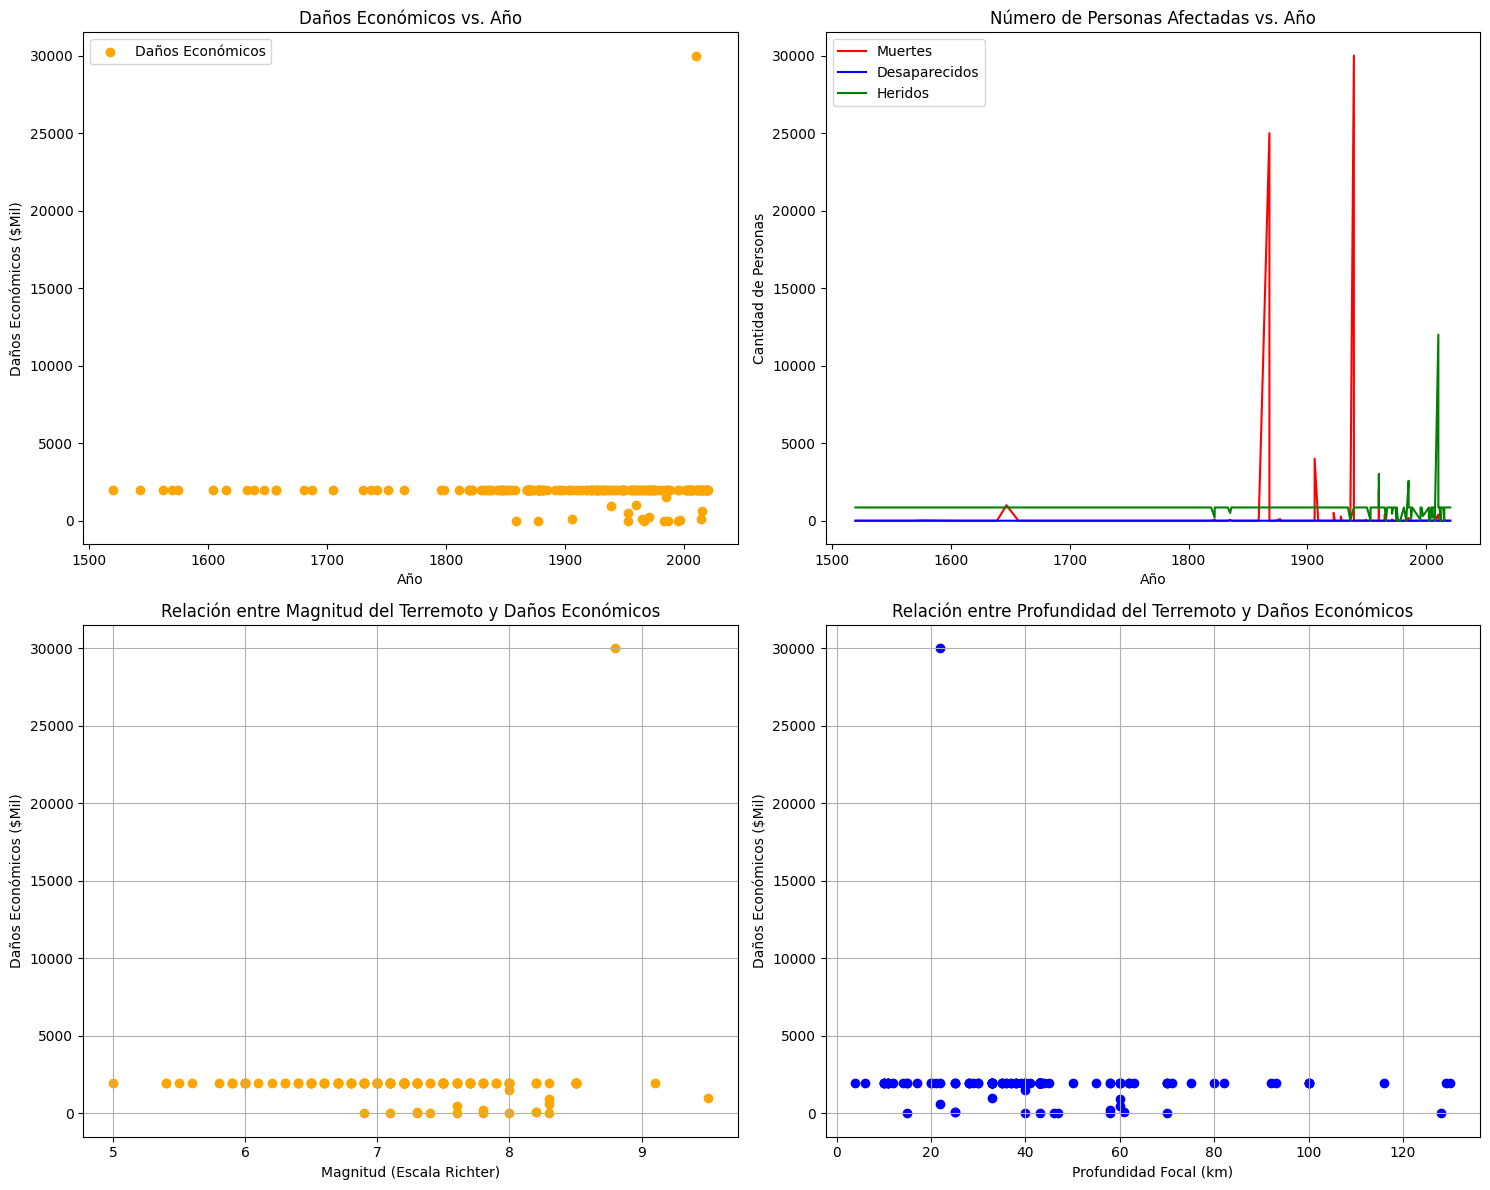

In [236]:
import matplotlib.backends.backend_pdf

# Creamos un objeto para el PDF
pdf = matplotlib.backends.backend_pdf.PdfPages("salida/graficos_chile_earthquakes.pdf")

# Gráfico 1: Histograma de Magnitudes
plt.hist(df['Mag'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Magnitud (Escala Richter)')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Magnitudes de los Terremotos en Chile')
pdf.savefig()  # Guardamos este gráfico en el PDF

# Gráfico 2: Dispersión de Latitud y Longitud
plt.figure(figsize=(8,6))  # Creamos una nueva figura para el siguiente gráfico
plt.scatter(df['Longitude'], df['Latitude'], color='green', label='Epicentro del Terremoto')
plt.title('Distribución Espacial (Ubicación) de Terremotos en Chile', fontsize=16)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitud', fontsize=14)
plt.legend(fontsize=12)
pdf.savefig()  # Guardamos este gráfico en el PDF

# Gráfico 3: Barras de Tsunamis por Año
tsunami_events = df[df['Tsu'] != 0]  # Filtrar los eventos de tsunami
tsunami_count_by_year = tsunami_events.groupby('Year')['Tsu'].count()
plt.figure()  # Creamos una nueva figura para el siguiente gráfico
plt.bar(tsunami_count_by_year.index, tsunami_count_by_year.values, color='blue')
plt.title('Número de Terremotos con Tsunamis Asociados por Año en Chile', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Tsunamis', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
pdf.savefig()  # Guardamos este gráfico en el PDF

# Gráfico 4: Línea de Magnitud vs. Año
plt.figure(figsize=(20, 10))  # Creamos una nueva figura para el siguiente gráfico
plt.plot(df['Year'], df['Mag'], marker='o', linestyle='-')
plt.title('Magnitud de los Terremotos en Chile a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Magnitud')
plt.grid(True)
pdf.savefig()  # Guardamos este gráfico en el PDF

# Gráfico 5: Dispersión de Magnitud vs. Profundidad Focal
plt.figure()  # Creamos una nueva figura para el siguiente gráfico
plt.scatter(df['Focal Depth (km)'], df['Mag'], color='blue', alpha=0.5)
plt.title('Magnitud vs. Profundidad Focal de los Terremotos en Chile', fontsize=16)
plt.xlabel('Profundidad Focal (km)', fontsize=14)
plt.ylabel('Magnitud (Escala Richter)', fontsize=14)
plt.grid(True)
pdf.savefig()  # Guardamos este gráfico en el PDF

# Gráfico 6: Subgráfico de Daños Económicos vs. Año y Personas Afectadas vs. Año
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.scatter(df['Year'], df['Damage ($Mil)'], color='orange', label='Daños Económicos')
ax1.set_title('Daños Económicos vs. Año')
ax1.set_xlabel('Año')
ax1.set_ylabel('Daños Económicos ($Mil)')
ax1.legend()
ax2.plot(df['Year'], df['Deaths'], color='red', label='Muertes')
ax2.plot(df['Year'], df['Missing'], color='blue', label='Desaparecidos')
ax2.plot(df['Year'], df['Injuries'], color='green', label='Heridos')
ax2.set_title('Número de Personas Afectadas vs. Año')
ax2.set_xlabel('Año')
ax2.set_ylabel('Cantidad de Personas')
ax2.legend()
plt.tight_layout()
pdf.savefig()  # Gauardamos este gráfico en el PDF

# Cerramos el PDF
pdf.close()


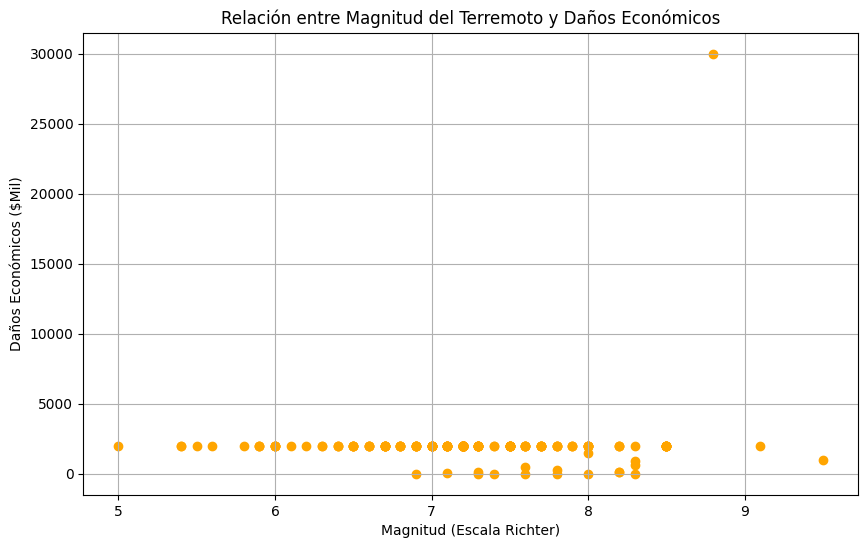

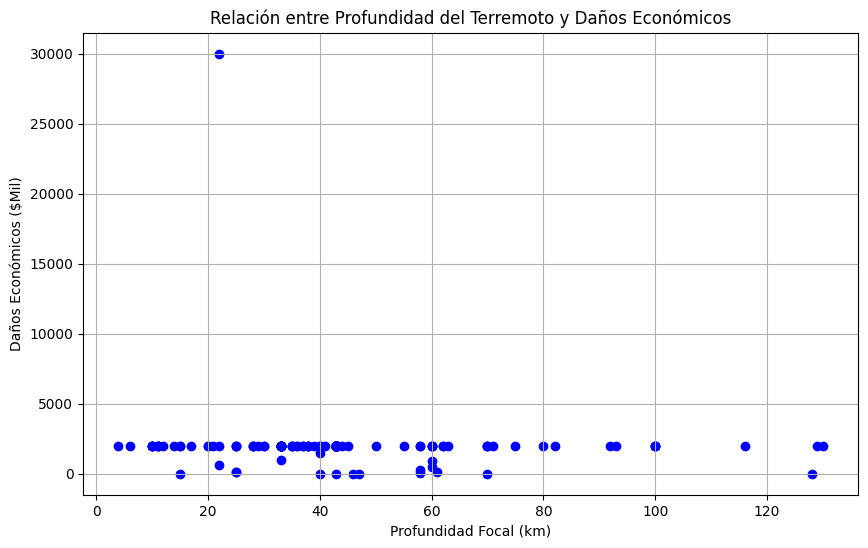

In [237]:
# Graficar la relación entre la magnitud y el daño
plt.figure(figsize=(10, 6))
plt.scatter(df['Mag'], df['Damage ($Mil)'], color='orange')
plt.title('Relación entre Magnitud del Terremoto y Daños Económicos')
plt.xlabel('Magnitud (Escala Richter)')
plt.ylabel('Daños Económicos ($Mil)')
plt.grid(True)
plt.show()

# Graficar la relación entre la profundidad y el daño
plt.figure(figsize=(10, 6))
plt.scatter(df['Focal Depth (km)'], df['Damage ($Mil)'], color='blue')
plt.title('Relación entre Profundidad del Terremoto y Daños Económicos')
plt.xlabel('Profundidad Focal (km)')
plt.ylabel('Daños Económicos ($Mil)')
plt.grid(True)
plt.show()